# 오디오 신호 처리 (Audio Signal Processing)

* 소리는 공기 중의 진동으로 인해 발생하는 압축파
* 진동은 공간이나 매질을 통해 파동(wave)의 형태로 전파
* 오디오 신호의 세 가지 주요 요소인 위상(Phase), 진폭(Amplitude), 주파수(Frequency)를 통해 파동의 특성 이해
  + 위상 (Phase)
    - 파동의 특정 시점에서의 변위 상태
    - 즉, 파동이 주기적 경로를 따라 어느 위치에 있는지를 나타내는 것
    - 위상은 각도(도)로 측정되며, 두 개 이상의 파동이 어떻게 상호작용하는지 이해하는 데 중요
    - 서로 다른 위상을 가진 두 파동이 만나면 상쇄 현상이 발생
  + 진폭 (Amplitude)
    - 파동의 강도 또는 크기
    - 소리에서 진폭은 소리의 크기(볼륨)와 관련이 있음
    - 높은 진폭은 큰 소리를, 낮은 진폭은 작은 소리를 나타냄
    - 진폭은 파동이 얼마나 멀리 이동하는지를 나타내며, 시각적으로는 파동의 최고점과 최저점 사이의 거리로 표현
  + 주파수 (Frequency)
    - 단위 시간당 파동의 주기가 몇 번 발생하는지를 나타냄
    - 즉, 파동이 얼마나 빨리 진동하는지를 나타내며, 헤르츠(Hz) 단위로 측정
    - 높은 주파수는 높은 피치(높은 음)를, 낮은 주파수는 낮은 피치(낮은 음)를 나타냄
    - 음악이나 대화에서 다양한 주파수의 조합은 다양한 음색과 음향 효과를 생성

![](https://miro.medium.com/max/700/0*QFVha2lCgyhKjhuO.gif)





## 오디오 라이브러리 (Audio Library)

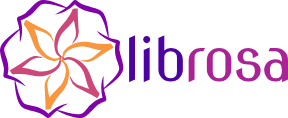

* Librosa는 데이터 과학자, 음악 기술 연구자, 오디오 엔지니어 등 다양한 분야의 전문가들에게 유용한 도구
* 오디오 데이터의 복잡한 분석을 수행하고, 사용자에게 더 풍부한 오디오 경험을 제공할 수 있는 애플리케이션 개발 가능
* 주요 기능
  - 오디오 처리: 오디오 파일을 로드하고, 변환하는 기본 기능을 제공하고, 이를 통해 사용자는 다양한 포맷의 오디오 파일을 쉽게 분석하고 처리 가능
  - 특징 추출: 음성 신호에서 다양한 유형의 오디오 특징 (멜 주파수 켑스트럼 계수(MFCCs), 크로마그램, 스펙트로그램)을 추출하는 데 사용 (이러한 특징들은 음악 장르 분류, 감정 분석, 음악 추천 시스템 등에 활용)
  - 시각화: 오디오 데이터의 시각적 분석을 위한 도구도 포함되어 있음 (오디오 신호의 파형(waveform)이나 스펙트로그램 시각화)
  - 음악 이론 통합: 피치, 비트, 템포와 같은 음악 이론적 요소들을 분석하고 추출하는 기능을 제공 (음악적 구조와 패턴을 이해하는 데 도움)
  - 효율적인 알고리즘: 고급 수학적 알고리즘과 데이터 처리 기술을 사용하여 효율적으로 오디오 데이터를 처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import librosa

In [2]:
librosa.__version__

'0.10.1'

## 오디오 데이터 (Audio Data)

In [3]:
from IPython.display import Audio

sr = 22_050
y_sweep = librosa.chirp(
    fmin=librosa.note_to_hz('C1'), 
    fmax=librosa.note_to_hz('C7'),
    sr=sr,
    duration=3
)

Audio(data=y_sweep, rate=sr)

In [4]:
y, sr = librosa.load(librosa.ex('brahms'))

Audio(data=y, rate=sr)

c:\Users\kksoo\anaconda3\envs\torch\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## 음성 데이터 (Speech Data)

* Pytorch의 TorchAudio를 사용해 내장 데이터셋을 가져옴
* 데이터가 크기 때문에 시간이 많이 소요

In [5]:
import torch
import torchaudio

print(torchaudio.__version__)

train_dataset = torchaudio.datasets.LIBRISPEECH('./', url='train-clean-100', download=True)
test_dataset = torchaudio.datasets.LIBRISPEECH('./', url='test-clean', download=True)

2.1.2


*   불러온 음성 데이터 확인
  *   첫번째 줄에서는 소리 데이터 확인 가능
  *   두번째 줄에선 해당 데이터의 sampling rate 확인 가능





In [6]:
print(test_dataset[0])
print(test_dataset[0][0].shape)

(tensor([[0.0003, 0.0003, 0.0004,  ..., 0.0021, 0.0021, 0.0016]]), 16000, 'HE HOPED THERE WOULD BE STEW FOR DINNER TURNIPS AND CARROTS AND BRUISED POTATOES AND FAT MUTTON PIECES TO BE LADLED OUT IN THICK PEPPERED FLOUR FATTENED SAUCE', 1089, 134686, 0)
torch.Size([1, 166960])


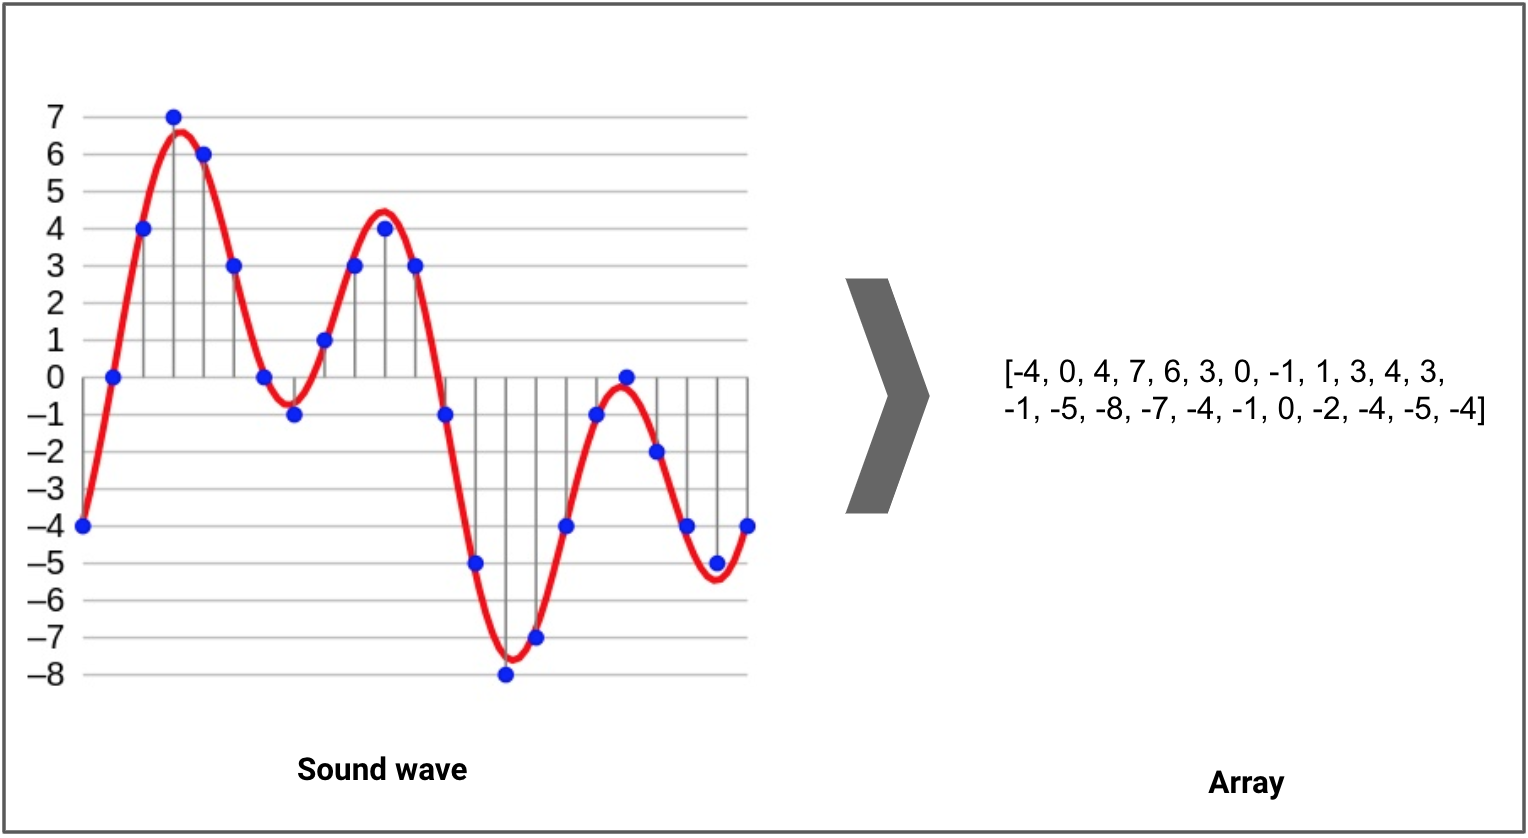

## 샘플링 (Sampling)

* 샘플링은 음성과 같은 아날로그 신호를 디지털 신호로 변환하는 과정에서 매우 중요한 역할
* 아날로그 신호의 연속적인 값을 이산적인 디지털 데이터로 변환하는 것을 포함
* 아날로그 신호를 무한히 세분화하여 저장하는 것은 불가능하므로, 일정한 간격으로 신호를 측정하고 이 값들을 대표값으로 사용 (이러한 일련의 과정이 샘플링)
* 샘플링 프로세스는 Time Domain 방식을 사용하는 것이 일반적이고, 이는 시간을 기준으로 아날로그 신호를 쪼개는 방식이며, 각 샘플은 특정 시간 간격으로 취해진 신호의 값을 나타냄
* 샘플링은 디지털 오디오 처리의 핵심적인 단계로, 적절한 샘플링 레이트와 샘플링 정리의 이해는 고품질의 디지털 오디오 생성에 필수적
* 음악 제작, 음성 인식, 오디오 압축 등 다양한 오디오 관련 애플리케이션에서 중요한 역할

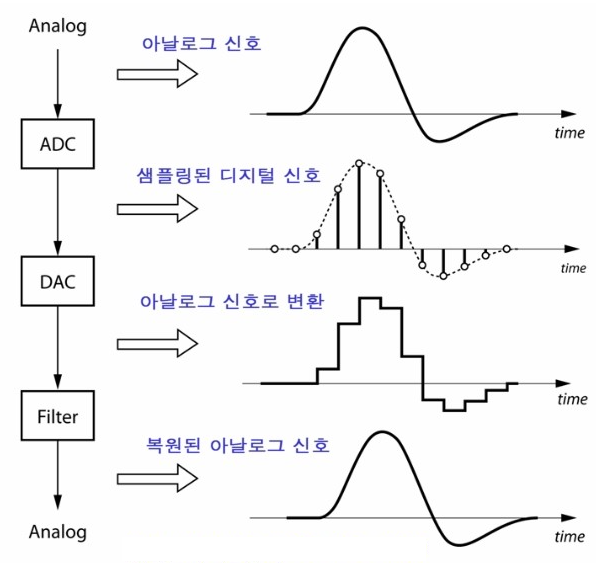

* 샘플링 레이트 (Sampling Rate):
  + 단위 시간당 얼마나 많은 샘플을 취할 것인지를 결정
  + 샘플링 레이트가 높을수록 원본 아날로그 신호를 더 정밀하게 디지털화할 수 있지만, 이는 데이터 크기가 증가하는 것을 의미
  + 일반적으로 샘플링은 인간의 청각 영역에 맞게 형성
    - Audio CD : 44.1 kHz(44100 sample/second)
    - Speech communication : 8 kHz(8000 sample/second)
* 샘플링 정리 (Sampling Theorem)
  + 디지털 신호로 변환할 때 원본 신호를 완전히 복원하기 위한 최소 샘플링 레이트에 대한 기준을 제공
  + 에일리어싱(aliasing): 아날로그 신호의 표본화시 표본화 주파수가 신호의 최대 주파수의 2배보다 작거나 필터링이 부적절하여 인접한 스펙트럼들이 서로 겹쳐 생기는 신호 왜곡 현상

In [7]:
test_dataset[1]

(tensor([[ 0.0010,  0.0011,  0.0009,  ..., -0.0007, -0.0010, -0.0011]]),
 16000,
 'STUFF IT INTO YOU HIS BELLY COUNSELLED HIM',
 1089,
 134686,
 1)

In [8]:
import IPython.display as ipd

audio_data = test_dataset[1][0][0]
sr = test_dataset[1][1]

print(audio_data, sr)
print(f"Length: {len(audio_data)}")
print(f"Duration: {len(audio_data) / sr}")

ipd.Audio(audio_data, rate=sr)

tensor([ 0.0010,  0.0011,  0.0009,  ..., -0.0007, -0.0010, -0.0011]) 16000
Length: 52400
Duration: 3.275


### 리샘플링 (Resampling)

* 샘플링된 데이터의 샘플링 레이트를 조정하여 다시 샘플링하는 과정으로 샘플링 레이트를 높이거나 낮출 수 있음
* 리샘플링 과정에서 가장 중요한 부분은 원래 신호의 특성을 가능한 한 유지하는 것
* 리샘플링 과정에서는 보통 보간(interpolation)이라는 기술이 사용되고, 보간은 새로운 샘플링 레이트에 맞게 기존 샘플들 사이에 새로운 샘플 포인트를 생성하는 과정
* 이때, 고주파 노이즈를 제거하기 위해 로우패스 필터(low-pass filter)를 사용하는 것이 일반적
* 로우패스 필터는 원하는 샘플링 레이트보다 높은 주파수의 신호를 제거하여 에일리어싱(aliasing) 현상을 방지

In [9]:
y = audio_data.numpy()

y

array([ 0.0010376 ,  0.00109863,  0.00091553, ..., -0.0007019 ,
       -0.00097656, -0.00109863], dtype=float32)

In [10]:
y_8k = librosa.resample(
    y=y,
    orig_sr=sr,
    target_sr=8_000
)

print(len(y), len(y_8k))
ipd.Audio(y_8k, rate=8_000)

52400 26200


In [11]:
y_4k = librosa.resample(
    y=y,
    orig_sr=sr,
    target_sr=4_000
)

print(len(y), len(y_4k))
ipd.Audio(y_4k, rate=4_000)

52400 13100


### Normalization

* 오디오 신호의 진폭을 조정하는 과정
* 오디오 신호의 최대 진폭을 특정한 수준으로 맞추는 것
* 일반적으로 이는 오디오 신호가 가질 수 있는 최대 범위를 전체적으로 활용하도록 함
* 예를 들어, 오디오 신호의 최대 진폭을 0dB까지 늘리는 것이 일반적인 과정
* 주요 이점
  + 신호의 동적 범위 최대화: 신호의 동적 범위를 최대화하여 소리의 세부사항을 더 잘 포착할 수 있게 함
  + 일관된 오디오 레벨: 다양한 출처에서 오는 오디오 신호의 볼륨을 일정하게 유지할 수 있음

In [12]:
normed_wav = y / max(np.abs(y))
ipd.Audio(normed_wav, rate=sr)

### Quantization

* 아날로그 신호를 디지털 신호로 변환할 때 발생하는 과정으로, 연속적인 아날로그 신호를 이산적인 값으로 변환
* 즉, 각 샘플의 아날로그 값이 제한된 수의 디지털 값 중 하나로 매핑되는 것
* 예를 들어, 16비트 오디오 시스템에서는 각 샘플이 65,536(2^16)개의 가능한 값 중 하나를 가질 수 있음
* 주요 특징
  + 비트 깊이(Bit Depth): 양자화의 정밀도는 비트 깊이에 의해 결정되며, 비트 깊이가 높을수록 더 많은 디지털 값이 사용되어 더 정밀한 아날로그-디지털 변환이 가능
  + 양자화 노이즈: 양자화 과정에서는 원본 아날로그 신호와 디지털화된 신호 사이의 작은 차이가 발생할 수 있으며, 이를 양자화 노이즈라고 하고, 이 노이즈는 신호의 디테일을 손실시킬 수 있으며, 특히 낮은 비트 깊이에서 더 두드러짐
* 주요 이점
  + 효율적인 저장 및 처리: 양자화를 통해 아날로그 신호를 디지털 형태로 저장하고 처리할 수 있으며, 이는 컴퓨터 시스템과 디지털 오디오 장비에서 필수적
  + 신호의 재생산과 전송: 디지털 형태의 오디오 신호는 아날로그 신호에 비해 더 쉽게 복제하고 전송 가능

In [13]:
bit = 8
max_val = 2 ** (bit - 1)

quantized_8_wav = normed_wav * max_val # 원래 크기로 변환
quantized_8_wav = np.round(quantized_8_wav).astype(int) # 정수로 변환
quantized_8_wav = np.clip(quantized_8_wav, -max_val, max_val - 1) # 오버플로우 방지

ipd.Audio(quantized_8_wav, rate=sr)

### μ-law encoding

* 오디오 신호를 디지털화할 때 사용되는 일종의 비선형 양자화 기법
* 특히 전화 통신에서 음성 신호를 디지털 형태로 압축하고 전송하는 데 널리 사용
* 주요 목표는 신호의 동적 범위를 줄이면서, 인간의 청각 특성에 따라 신호의 중요한 부분을 보다 효과적으로 전달하는 것
* 주요 특징과 원리
  + 비선형 양자화
    - 신호의 모든 부분을 동일한 정밀도로 처리하지 않는대신, 작은 신호(소리)는 높은 정밀도로, 큰 신호는 상대적으로 낮은 정밀도로 양자화
    - 인간의 귀가 작은 신호의 변화에는 민감하지만, 큰 신호의 변화에는 덜 민감한 특성을 반영한 것
  + 다이나믹 레인지 압축
    - 신호의 다이나믹 레인지를 압축
    - 신호의 볼륨 차이가 큰 경우에도 효과적으로 신호를 전송할 수 있게 해줌
    - 결과적으로, 더 넓은 범위의 신호를 낮은 비트율로 효율적으로 전송 가능
  + 표준화된 포맷
    - 북미와 일본의 전화 시스템에서 표준으로 사용
    - 유럽 및 다른 지역에서는 유사한 A-Law 인코딩 방식이 사용
  + 음성 통신에 최적화: 음성 신호의 특성에 맞춰 최적화되어 있어, 음성의 이해도를 높이면서 데이터 전송률을 낮추는 데 도움이 됨

In [14]:
def mu_law(x, mu=255):
    return np.sign(x) * np.log(1 + mu * np.abs(x)) / np.log(1 + mu)

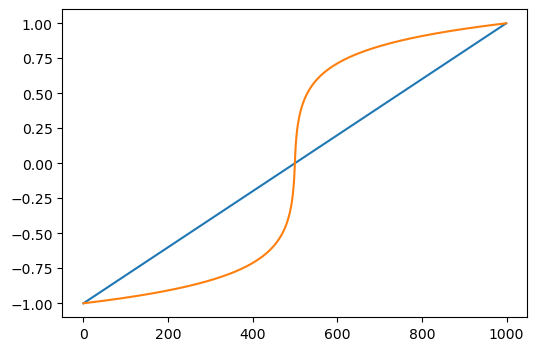

In [15]:
x = np.linspace(-1, 1, 1_000)
x_mu = mu_law(x)

plt.figure(figsize=(6, 4))

plt.plot(x)
plt.plot(x_mu)

plt.show()

In [16]:
mu_law_wav = mu_law(normed_wav)

ipd.Audio(mu_law_wav, rate=sr)

## 필터(Audio Filter)

* 오디오 신호에서 특정 주파수 범위를 강조하거나 억제하는 데 사용되는 전자 또는 디지털 도구
* 오디오 신호 처리에서 필터는 원하는 신호 구성요소를 선택하거나 원치 않는 잡음을 제거하는 데 중요한 역할
* 주요 유형
  + 저역통과 필터 (Low-Pass Filter)
    - 특정 절단 주파수(cutoff frequency) 이하의 신호를 통과시키고, 그 이상의 주파수를 차단
    - 배경 소음 제거 또는 저음 강조에 사용
  + 고역통과 필터 (High-Pass Filter)
    - 절단 주파수 이상의 신호만 통과시키고, 그 이하의 주파수를 차단
    - 저주파 잡음 제거나 고음 강조에 사용
  + 대역통과 필터 (Band-Pass Filter)
    - 특정 주파수 범위 내의 신호만 통과시키고, 그 범위 밖의 신호를 차단
    - 특정 주파수 대역의 신호를 분리할 때 사용
  + 대역저지 필터 (Band-Stop Filter 또는 Notch Filter)
    - 특정 주파수 범위의 신호를 차단하고, 나머지 주파수는 통과
    - 특정 주파수의 잡음이나 간섭을 제거할 때 유용
* 필터의 특성
  + 절단 주파수 (Cutoff Frequency): 필터가 신호를 통과시키거나 차단하기 시작하는 주파수
  + 경사도 (Slope 또는 Roll-off): 필터가 얼마나 빠르게 주파수를 차단하거나 통과시키는지를 나타냄 (단위는 dB/octave(데시벨/옥타브)로 표시)
  + Q 인자 (Q Factor): 필터의 선택적인 주파수 대역폭을 결정하고, Q가 높을수록 더 좁은 주파수 대역을 영향을 줌

* 버터워스 필터(Butterworth Filter)
  + 특정 주파수 대역을 가능한 한 평탄하게 통과시키면서 다른 대역의 신호를 제거하거나 감쇠시킴
  + 주요 특징은 주파수 응답 곡선이 '최대 평탄성(maximally flat)'을 가진다는 것으로 절단 주파수(cutoff frequency) 근처에서 신호의 변형이 최소화
* 특성
  + 최대 평탄성: 절단 주파수에서의 주파수 응답이 매끄럽게 변화하여, '리플(ripple)'이나 급격한 변동이 없음 (오디오 신호의 질을 유지하는 데 도움)
  + 경사도(Slope 또는 Roll-off): 버터워스 필터는 특정 주파수 대역 이후로 신호를 감쇠시키는 속도가 정해져 있음
  + 경사도는 필터의 차수(order)에 따라 결정되며, 필터 차수가 높을수록 경사도는 급격해짐
  + 저역통과, 고역통과, 대역통과, 대역저지: 버터워스 필터는 저역통과(low-pass), 고역통과(high-pass), 대역통과(band-pass), 대역저지(band-stop 또는 notch) 필터로 구현 가능

In [17]:
from scipy.signal import butter, lfilter, freqz

def butter_pass(cutoff, fs, btype, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    return b, a

def butter_filter(data, cutoff, fs, btype, order=5):
    b, a = butter_pass(cutoff, fs, btype, order=order)
    y = lfilter(b, a, data)
    return y

In [18]:
order = 6
fs = 16_000
cutoff = 2048

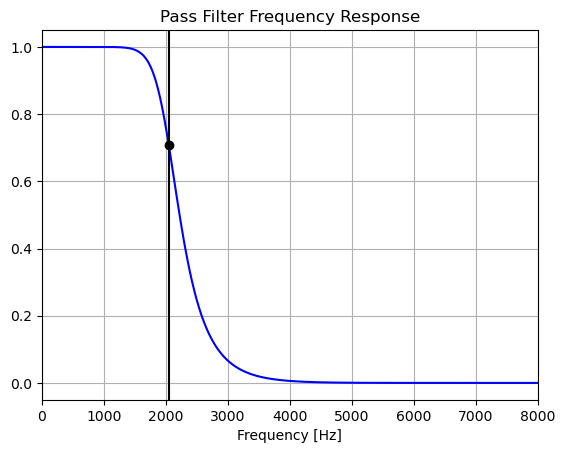

In [19]:
b, a = butter_pass(cutoff, fs, 'lowpass', order)
w, h = freqz(b, a, worN=8_000)

plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')

plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title('Pass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.grid()

plt.show()

In [20]:
T = len(y) / sr
n = int(T * sr)
t = np.linspace(0, T, n, endpoint=False)
y = butter_filter(y, cutoff, fs, 'lowpass', order)

ipd.Audio(y, rate=fs)

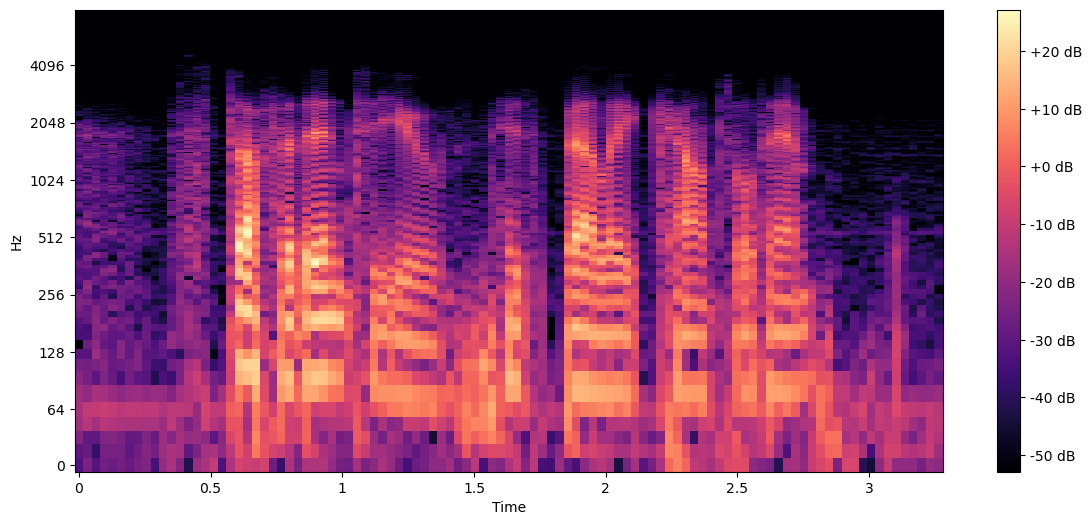

In [21]:
X = librosa.core.stft(y, n_fft=1_024, hop_length=512, win_length=1_024)
S = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 6))
librosa.display.specshow(S, sr=fs, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

plt.show()

# 오디오 표현 (Audio Representation)

* 소리 데이터를 시각적이고 이해하기 쉬운 형태로 변환하는 방법
  + Time-Domain Representation
    - 소리를 시간의 흐름에 따라 나타냄
    - 오디오 신호는 공기의 파동, 즉 소리의 압력 변화로 표현
    - 소리의 강도와 지속 시간을 시간 축에 따라 그래프로 나타냄
    - 소리의 강도 변화를 직접적으로 볼 수 있음
    - 파형 그래프(Waveform)는 이러한 표현의 전형적인 예
  + Time-Frequency Representation
    - 이 표현 방식은 시간 축과 빈도 축을 모두 사용하여 소리 데이터를 나타냄
    - 시간에 따른 주파수의 변화를 시각화함
    - 이 방법은 특히 복잡한 소리 구조를 분석할 때 유용
    - 스펙트로그램(Spectrogram)은 소리의 주파수 성분이 시간에 따라 어떻게 변화하는지 보여줌

## 파형 (Waveform) - Time-Domain Representation

* 오디오의 자연적인 표현
* 시간에 따른 소리의 압력 변화(진폭)를 나타냄
* X축은 시간을 나타내며, Y축은 소리의 진폭(크기)
* 소리의 볼륨 변화, 지속 시간, 그리고 기본적인 구조를 보여주고, 음악 제작, 오디오 편집 등에서 소리의 기본적인 형태를 파악하는 데 유용

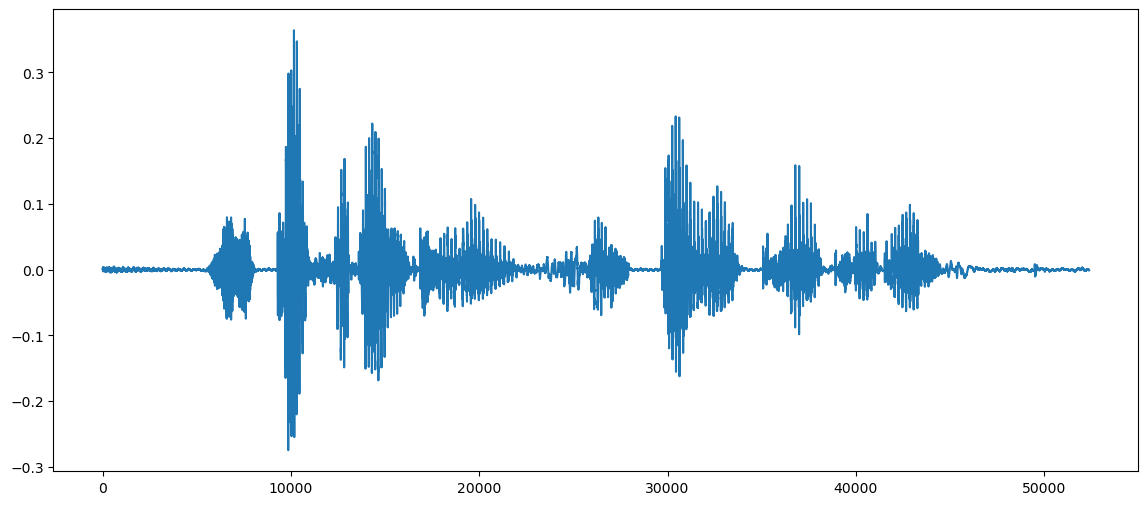

In [22]:
y = audio_data.numpy()

fig = plt.figure(figsize=(14, 6))
plt.plot(y[0:1_000_000])
plt.show()

## 정현파 (Sinusoid) - Time-Frequency Representation

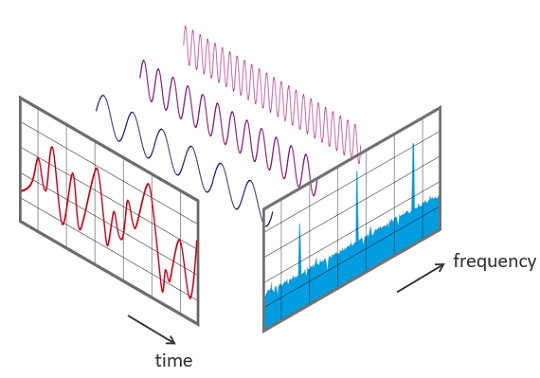

* 정현파는 가장 기본적인 파형 중 하나로, 순수한 톤을 나타내고, 시간에 따라 일정한 주기와 진폭을 가지며, 수학적으로는 사인(sine) 또는 코사인(cosine) 함수로 표현
$f(t) = A \sin(2\pi ft + \phi)$
  - $A$: 진폭(파형의 높이)
  - $f$: 주파수(1초당 진동 횟수)
  - $\phi$: 위상(파형의 시작점)
  - $t$: 시간
* 모든 신호는 주파수(frequency)와 크기(magnitude), 위상(phase)이 다른 정현파(sinusolida signal)의 조합으로 나타낼 수 있음
* 푸리에 변환(Fourier Transform)은 조합된 정현파의 합(하모니) 신호에서 그 신호를 구성하는 정현파들을 각각 분리해내는 방법

In [23]:
def Sinusoid(A, f, phi, fs, t):
    t = np.arange(0, t, 1.0/fs)
    x = A * np.cos(2*np.pi*f*t + phi)
    
    return x

In [24]:
A = .9
f = 340
phi = np.pi/2
fs = 22_050 # sr
t = 1

sin = Sinusoid(A, f, phi, fs, t)

In [25]:
A = .9
f = 260
phi = np.pi/2
fs = 22_050 # sr
t = 1

sin_2 = Sinusoid(A, f, phi, fs, t)

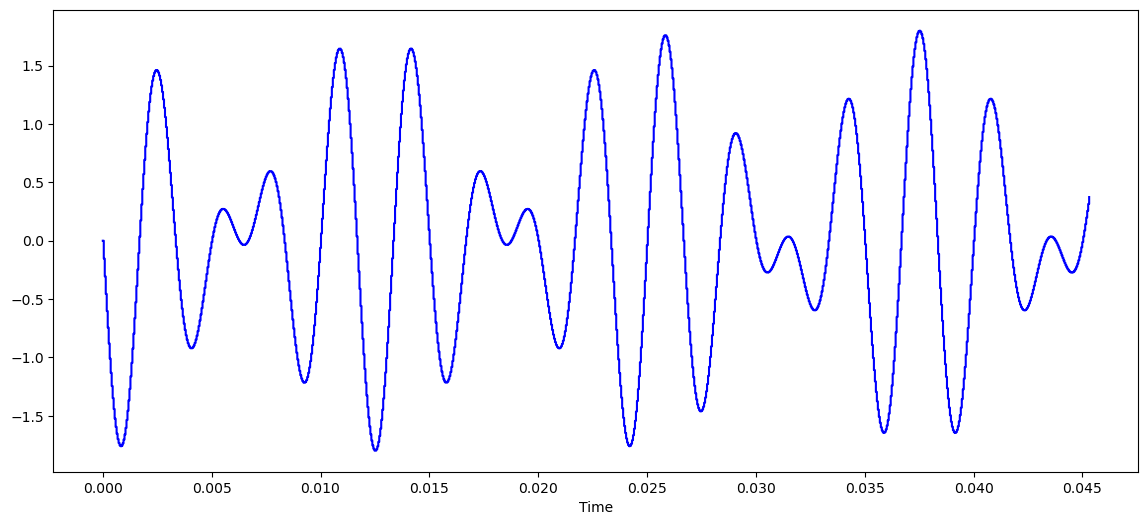

In [26]:
complex_wave = sin + sin_2

fig = plt.figure(figsize=(14, 6))
librosa.display.waveshow(complex_wave[:1_000], sr=fs, color='blue')

In [27]:
ipd.Audio(sin + sin/2 + sin/4, rate=fs)

In [28]:
def gen_sinusoid_scale(pitches=[69], duration=.5, Fs=22_050, amplitude_max=.5):
    N = int(duration * Fs)
    t = np.arange(N) / Fs
    x = []
    
    for pitch in pitches:
        omega = np.square((pitch - 69) / 12) * 440
        x = np.append(x, np.sin(2*np.pi*omega*t))
    
    x = amplitude_max * x/np.max(x)

    return x

duration = 1
Fs = 22_050

pitches = [36, 48, 60, 72, 84, 96]
x = gen_sinusoid_scale(pitches=pitches, Fs=Fs)

ipd.Audio(data=x, rate=Fs)

## 푸리에 변환 (Fourier Fransform)

* 푸리에 변환은 시간 도메인에서의 신호를 주파수 도메인으로 변환하는 수학적 도구
  + 시간 도메인: 신호가 시간에 따라 어떻게 변하는지를 나타냄 (예: 오디오 신호의 파형).
  + 주파수 도메인: 같은 신호를 주파수 성분으로 나타낸 것 (각 주파수 성분은 신호에 얼마나 강하게 존재하는지를 나타냄)
* 복잡한 신호를 구성하는 기본적인 주파수 성분으로 분해하여, 신호의 주파수적 특성 분석 가능
  + 푸리에 변환을 통해, 복잡한 신호는 여러 정현파(sinusoids)로 분해 가능
  + 정현파들은 원래 신호를 구성하는 주파수 성분을 나타냄
  + 역푸리에 변환(Inverse Fourier Transform)을 사용하면, 이 주파수 성분들을 다시 합쳐 원래의 시간 도메인 신호 재구성 가능

* 푸리에 변환은 임의의 입력 신호를 다양한 주파수를 갖는 주기 함수들의 합으로 분해하여 표현하는 것을 의미
* 푸리에 변환 식
$$
A_k = \int_{-\infty}^\infty f(t) \, \exp \left( -iwt \right) \, dt
$$
$$
y(t)=\sum_{k=-\infty}^\infty A_k \, \exp \left( i\cdot 2\pi\frac{k}{T} t \right)
$$



* 위 식에는 주기 함수들은 포함되어 있지 않음
* 오일러 공식에 따라 다음과 같이 지수 함수와 주기 함수간 관계를 나타낼 수 있음
$$
e^{i\theta} = \cos{\theta} + i\sin{\theta}
$$

* 해당 식을 오일러 공식에 따라 다음과 같이 표현 가능

$$
\exp \left( i\cdot 2\pi\frac{k}{T} t \right) = \cos\left({2\pi\frac{k}{T}}\right) + i\sin\left({2\pi\frac{k}{T}}\right)
$$

* 결국, 푸리에 변환은 입력 신호에 상관없이 sin, cos 같은 주기 함수들의 합으로 분해 가능함을 나타냄

* 수학적으로, 푸리에 변환은 주어진 함수(신호)를 무한한 수의 정현파로 분해하는 과정
* 연속적인 신호에 대해 연속 푸리에 변환(Continuous Fourier Transform)을 사용, 디지털 신호에 대해서는 이산 푸리에 변환(Discrete Fourier Transform, DFT)이나 그 효율적인 계산 방식인 빠른 푸리에 변환(Fast Fourier Transform, FFT)을 사용

### 이산 푸리에 변환 (Discrete Fourier Transform, DFT)

* 이산 푸리에 변환은 연속적인 푸리에 변환을 이산적인 신호에 적용하기 위해 개발된 수학적 도구
* 디지털 신호 처리에서 매우 중요한 역할을 하며, 실제 컴퓨터나 디지털 시스템에서 신호의 주파수 분석 가능
* DFT는 연속적인 신호를 다루는 대신, 이산적인 샘플로 이루어진 신호를 처리
* 수집한 데이터 $y_n$에서 이산 시계열 데이터가 주기 N으로 반복한다고 할때, DFT는 주파수와 진폭이 다른 N개의 사인 함수 합으로 표현 가능
$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} Y_k \cdot \exp \left( i\cdot 2\pi\frac{k}{N} n \right)
$$
* 위 식을 보면 k의 range가 0부터 $N-1$로 변화했음을 알 수 있음
* 이때 Spectrum $Y_{k}$는 원래의 시계열 데이터에 대한 퓨리에 변환값
$$
Y_k = \sum_{n=0}^{N-1} y_n\cdot \exp \left( -i\cdot 2\pi\frac{k}{N} n \right)
$$
  + $y_{n}$ : input signal
  + $n$ : Discrete time index
  + $k$ : discrete frequency index
  + $Y_{k}$ : k번째 frequeny에 대한 Spectrum의 값



In [29]:
def DFT(x):
    N = len(x)
    X = np.array([])
    nv = np.arange(N)

    for k in nv:
        s = np.exp(1j*2*np.pi*k/N*nv)
        X = np.append(X, sum(x*np.conjugate(s)))
    
    return X

### Short-Time Fourier Transform (STFT)

* Short-Time Fourier Transform (STFT)은 시간에 따른 신호의 변화하는 주파수 내용을 분석하는 데 사용되는 수학적 도구
* 푸리에 변환의 개념을 확장하여, 시간에 따른 신호의 주파수 변화를 파악할 수 있게 함

* DFT는 시간에 흐름에 따라 신호의 수파수가 변했을때, 어느 시간대에 주파수가 변하는지 모름
* STFT는 시간의 길이를 나눠서 푸리에 변환
* 주파수의 특성이 시간에 따라 달라지는 사운드를 분석하는 방법이며, signal 데이터에 적합
* 시계열 데이터를 일정한 시간 구간 (window size)로 나누고, 각 구간에 대해서 스펙트럼을 구함
* STFT에 대한 식과 설명
$$
X(l,k) = \sum_{n=0}^{N-1} w(n) x(n+lH)\exp^{\frac{-2\pi k n}{N}}
$$
+ $N$ : FFT size
  - Window를 얼마나 많은 주파수 밴드로 나누는가
+ Duration
    - 샘플링 레이트를 window로 나눈 값
    - $T= window/SR$
    - T(Window) = 5T(Signal), duration은 신호주기보다 5배 이상 길게 잡아야함
    - 440Hz 신호의 window size는 5*(1/440)
- $w(n)$ : 윈도우 함수(Window function)
    - 일반적으로 Hann window 사용
- $n$ : 윈도우 크기(Window size)
    - Window 함수에 들어가는 Sample의 양
    - 작을수록 Low-frequency resolution을 가지게 되고, high-time resolution을 가짐
    - 길수록 High-frequency, low time resolution을 가짐
- $H$ : Hop size
    - 윈도우가 겹치는 사이즈, 일반적으로는 1/4정도를 겹치게 함
* STFT의 결과는 즉 시간의 흐름(Window)에 따른 Frequency영역별 Amplitude를 반환

In [30]:
audio_data = test_dataset[1][0][0]
sr = test_dataset[1][1]

print(audio_data, audio_data.shape)

y =  audio_data.numpy()

tensor([ 0.0010,  0.0011,  0.0009,  ..., -0.0007, -0.0010, -0.0011]) torch.Size([52400])


In [31]:
S = librosa.stft(y, n_fft=1_024, hop_length=512, win_length=1_024)

S, S.shape

(array([[ 0.02262602+0.0000000e+00j, -0.05884637+0.0000000e+00j,
         -0.02625498+0.0000000e+00j, ...,  0.04703658+0.0000000e+00j,
         -0.10275772+0.0000000e+00j,  0.08783279+0.0000000e+00j],
        [-0.02681388-1.8120866e-02j,  0.03790738-7.8518270e-03j,
         -0.00889512-9.1458801e-03j, ..., -0.04557749-2.3772500e-01j,
          0.13888891+3.1923160e-01j,  0.04679581-1.2743142e-01j],
        [ 0.06089374+4.4774324e-02j, -0.00690025-3.0232264e-02j,
          0.02921003+1.3654881e-02j, ..., -0.01928553+1.3721973e-01j,
         -0.1489643 -2.5934309e-01j, -0.20659886+2.4182068e-02j],
        ...,
        [-0.00046766+3.3541666e-03j, -0.00134465+2.0302692e-03j,
          0.00111155-1.3944925e-03j, ...,  0.00076722-1.4168157e-03j,
          0.00215575+1.2777701e-03j, -0.00049373+1.5059601e-04j],
        [-0.00252852-2.9581576e-03j, -0.001215  -2.1861666e-03j,
         -0.00376799+3.1128232e-03j, ..., -0.00342117+3.1496247e-03j,
         -0.00530687-2.5308989e-03j, -0.0011173 

In [32]:
D = np.abs(S)**2

D, D.shape

(array([[5.1193684e-04, 3.4628955e-03, 6.8932399e-04, ..., 2.2124404e-03,
         1.0559149e-02, 7.7145984e-03],
        [1.0473497e-03, 1.4986208e-03, 1.6277027e-04, ..., 5.8590494e-02,
         1.2119895e-01, 1.8428616e-02],
        [5.7127881e-03, 9.6160336e-04, 1.0396814e-03, ..., 1.9201186e-02,
         8.9449212e-02, 4.3267865e-02],
        ...,
        [1.1469139e-05, 5.9300896e-06, 3.1801526e-06, ..., 2.5959896e-06,
         6.2799381e-06, 2.6644986e-07],
        [1.5144133e-05, 6.2555437e-06, 2.3887440e-05, ..., 2.1624561e-05,
         3.4568307e-05, 4.2212682e-06],
        [1.6557269e-05, 3.0068535e-05, 4.4681386e-05, ..., 3.8015805e-05,
         5.6579658e-05, 1.1113687e-05]], dtype=float32),
 (513, 103))

C:\Users\kksoo\AppData\Local\Temp\ipykernel_24480\63327952.py:3: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  log_S = librosa.power_to_db(S, ref=np.max)


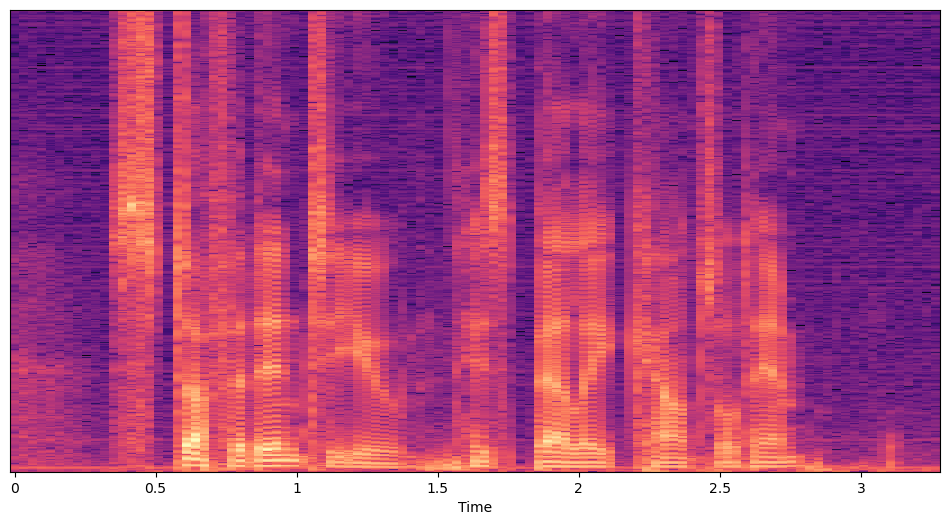

In [33]:
S = librosa.core.stft(y, n_fft=1_024, hop_length=512, win_length=1_024)
D = np.abs(S)**2
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(log_S, sr=16_000, x_axis='time')
plt.show()

* 윈도우 함수(Window Function) 기능
  + main-lobe를 제어
  + side-lobe의 레벨 trade-off를 제어
  + 깁스 현상(불연속을 포함하는 파형이 푸리에 합성되었을 때 불연속 값에서 나타나는 불일치 현상) 방지
* 윈도우 크기(Window Size)
  + time과 frequency의 resolutions를 제어
  + short-window - 낮은 frequency resolutuon, 높은 time resolution
  + long-window - 높은 frequency resolution, 낮은 time resolution

In [34]:
def frame_audio(audio, FFT_size=1_024, hop_size=20, sample_rate=22_050):
    audio = np.pad(audio, int(FFT_size/2), mode='reflect')
    frame_len = np.round(sample_rate*hop_size / 1_000).astype(int)
    frame_num = int((len(audio) - FFT_size) / frame_len) + 1
    frames = np.zeros((frame_num, FFT_size))

    for n in range(frame_num):
        frames[n] = audio[n*frame_len:n*frame_len + FFT_size]

    return frames

audio_framed = frame_audio(y)

audio_framed.shape

(119, 1024)

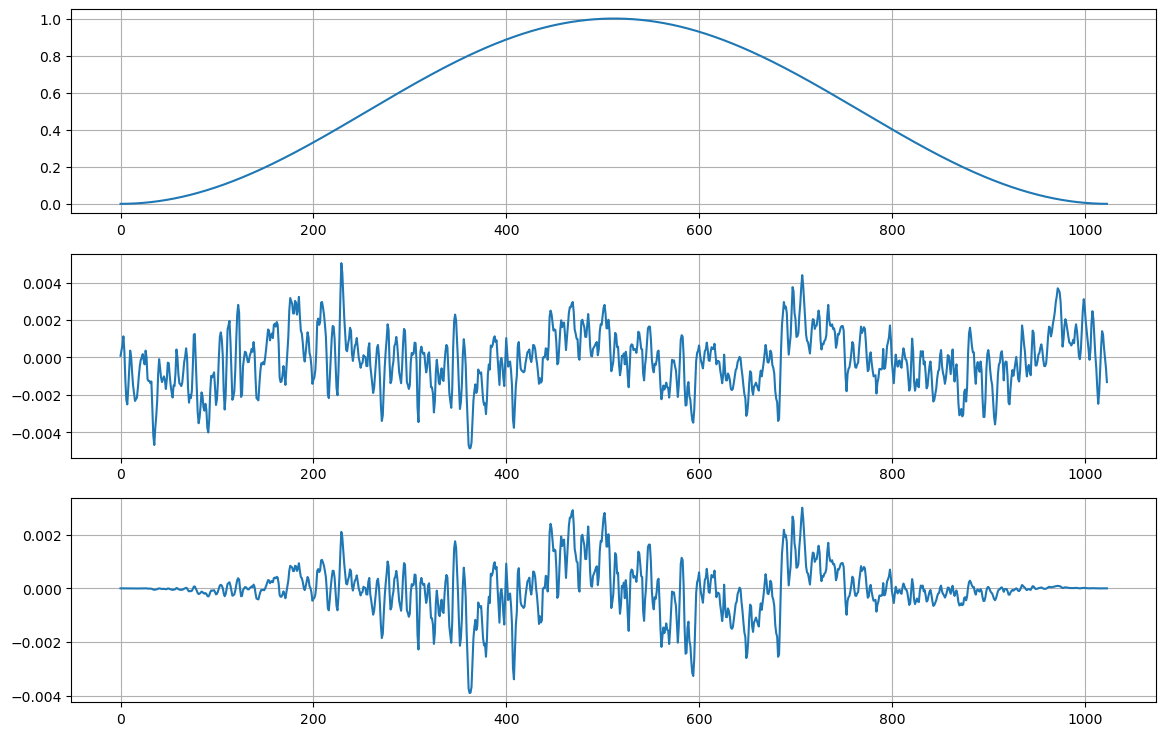

In [35]:
from scipy import signal


window = signal.get_window('hann', 1_024, fftbins=True)
audio_win = audio_framed * window
ind = 2

plt.figure(figsize=(14, 9))

plt.subplot(3, 1, 1)
plt.plot(window)
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(audio_framed[ind])
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(audio_win[ind])
plt.grid()

plt.show()

## 스펙트로그램 (Spectrogram)

* 오디오 신호나 기타 형태의 신호의 시간에 따른 주파수 분포와 강도를 시각적으로 나타내는 도구
* 주로 Short-Time Fourier Transform (STFT)를 사용하여 생성
* 오디오 신호의 시간적 변화와 주파수 콘텐츠를 동시에 파악할 수 있게함
* 시각적으로 파형과 스펙트럼의 특징이 조합되어 있음
* 시간 축과 주파수 축의 변화에 따라 진폭의 차이를 인쇄 농도나 표시 색상 차이로 표현



### 선형 주파수 스케일 (Linear Frequency Scale)

* 모든 주파수 구간이 동일한 간격으로 나눔
* 주파수의 절대적인 변화를 분석할 때 유용함
* 특히, 공학적이나 물리적인 분석에 적합
* 순음(single tone)들의 배음 구조를 파악하는데 적절함
* 분포가 저주파수 영역에 치우쳐져 있음



### 멜 스케일 (Mel Scale)

* 인간의 청각 인식을 반영하여 주파수를 나타냄
* 낮은 주파수에서는 더 많은 세부 정보를 보여주고, 높은 주파수에서는 세부 정보를 적게 보여줌 (인간의 귀가 낮은 주파수에서 더 민감하게 반응하기 때문)
* 음성 인식, 음악 분석 등 인간의 청각 경험을 모델링하는 데 특히 유용함
* 주파수 단위를 다음 공식에 따라 멜 스케일로 변환
$$
m = 2595 \log_{10}\left(1 + \frac{f}{700}\right)
$$
* 일반적으로 mel-scaled bin을 FFT size보다 조금 더 작게 만듬
* 멜 스케일을 적용해 스펙토그램으로 만든 것이 멜스펙토그램


In [36]:
S = librosa.core.stft(y, n_fft=1_024, hop_length=512, win_length=1_024)
D = np.square(S)

In [37]:
mel_basis = librosa.filters.mel(sr=sr, n_fft=1_024, n_mels=40)
mel_S = np.dot(mel_basis, D)

mel_S.shape

(40, 103)

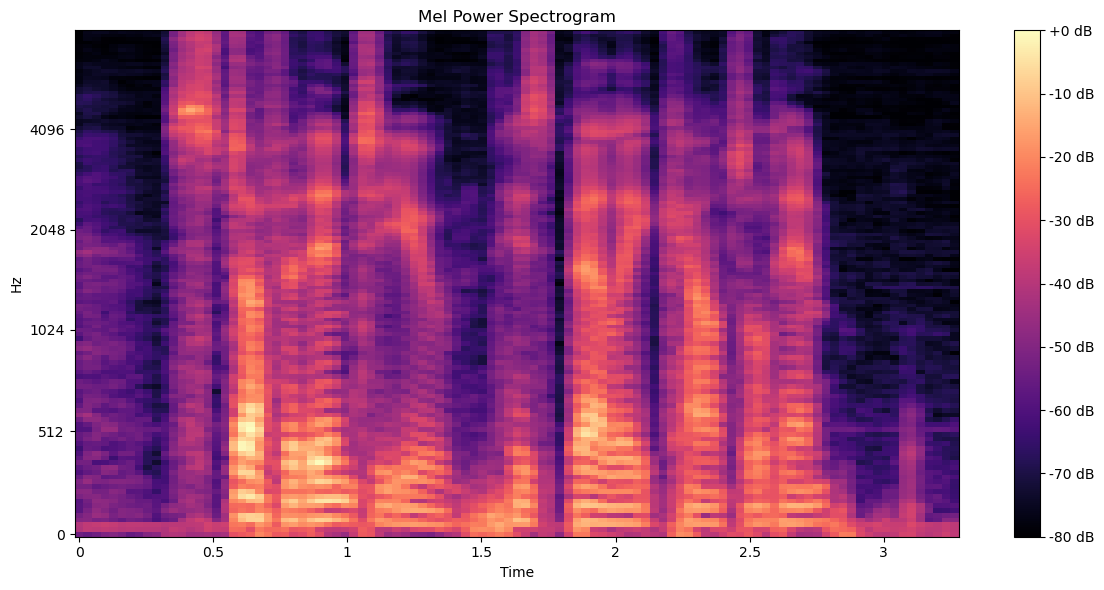

In [38]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Power Spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

### 바크 스케일 (Bark Scale)

* 인간의 청각적 특성을 기반으로 하는 또 다른 척도
* 주파수를 '크리티컬 밴드(critical bands)'로 나누어, 인간의 귀가 인식하는 소리의 변화를 더 잘 반영
* 음향 심리학 및 음성 처리에서 중요하며, 소리의 마스킹 효과나 음색 인식 등의 분석에 적용
* 귀가 인식하는 주파수의 영역은 대략 $20Hz~2000Hz$로 가정, 하지만 주파수에 대한 사람의 인식은 비선형적
* 귀와 뇌의 가청대역을 24개의 대역으로 나눈것을 Bark 라고 함
* Bark scale은 $500Hz$ 이하에서는 $100Hz$의 대역폭을, $500Hz$ 이상에서는 각 대역의 중심수파수의 대략 20%에 해당하는 대역폭을 가짐
  `20, 100, 200, 300, 400, 510, 630, 770, 920, 1080, 1270, 1480, 1720, 2000, 2320, 2700, 3150, 3700, 4400, 5300, 6400, 7700, 9500, 12000, 15500 ( Hz )`

### 로그 압축 (Log Compression)

* 로그 압축은 스펙트로그램의 동적 범위를 줄이는 방법
* 진폭이나 에너지 스케일을 로그 척도로 변환하여, 작은 변화도 쉽게 관찰할 수 있게 함
* 로그 압축은 넓은 동적 범위를 가진 신호
* 신호를 $ 10 * log10(\frac{S}{ref})$의 단위로 신호를 스케일링
* spectrogram을 데시벨 유닛으로 전환
* 음악이나 복잡한 오디오 환경에서 중요한 세부 정보를 강조하는 데 유용


In [39]:
log_mel_S =librosa.power_to_db(mel_S)

log_mel_S.shape

C:\Users\kksoo\AppData\Local\Temp\ipykernel_24480\3172369681.py:1: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  log_mel_S =librosa.power_to_db(mel_S)


(40, 103)

## 이산 코사인 변환 (Discrete Cosine Transform, DCT)

* 이산 코사인 변환은 신호나 이미지 처리 분야에서 널리 사용되는 수학적 변환
* 오디오 신호(1차원)에 대한 수학적 표현
$$
DCT[k] = \sum_{n=0}^{N-1} x[n] \cdot \cos\left[\frac{\pi k}{N} \left(n + \frac{1}{2}\right)\right]
$$
  - $x[n]$은 시간 도메인에서의 $n$번째 샘플(오디오 신호)
  - $N$은 샘플의 총 개수
  - $k$는 DCT 계수의 인덱스
* 이미지 처리(2차원)에 대한 수학적 표현
$$
DCT(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) \cos\left[\frac{\pi u (2x + 1)}{2M}\right] \cos\left[\frac{\pi v (2y + 1)}{2N}\right]
$$
  - $f(x, y)$는 원본 신호(이미지의 픽셀 값)
  - $M$과 $N$은 이미지의 가로 및 세로 크기
  - $u$와 $v$는 DCT 계수의 인덱스
* 주어진 신호를 코사인 함수의 합으로 표현하는 것으로, 이는 푸리에 변환과 유사하지만 주로 실수 영역에서 작동
* DCT는 $n$개의 데이터를 $n$개의 코사인 함수의 합으로 표현하여 데이터의 양을 줄이는 방식
* 저 주파수에 에너지가 집중되고 고 주파수 영역에 에너지가 감소

In [40]:
mfcc = librosa.feature.mfcc(S=log_mel_S, n_mfcc=13)
mfcc = mfcc.astype(np.float32)

plt.figure(figsize=(12, 6))
librosa.display.specshow(mfcc)
plt.show()

(13, 103)


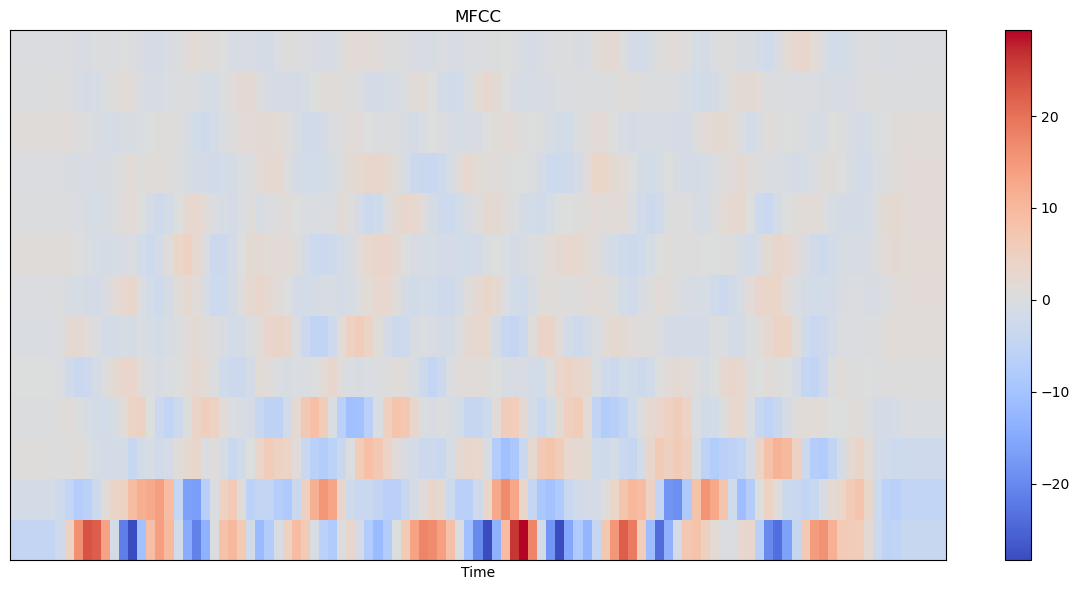

In [41]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

print(delta2_mfcc.shape)

plt.figure(figsize=(12, 6))
librosa.display.specshow(delta2_mfcc)

plt.xlabel('MFCC_Coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

# 오디오 특징 추출 (Audio Feature Extraction)

* 오디오 신호로부터 유용한 정보를 추출하여, 더 간결하고 의미 있는 형태로 변환하는 과정
* 오디오 신호의 분석, 분류, 인식 및 기타 처리를 위한 전처리 단계로, 음성 인식, 음악 분석, 감정 인식, 환경음 모니터링 등 다양한 분야에서 중요
* 시간 도메인 특징 (Time-Domain Features)
  + 진폭: 오디오 신호의 강도나 볼륨
  + 제로 크로싱 레이트 (Zero-Crossing Rate): 신호가 시간 축을 건너뛰는 속도, 주로 소리의 질감이나 주파수 내용의 변화를 나타냄
  + 에너지: 시간 도메인에서의 신호 강도, 주로 오디오의 볼륨 또는 강도를 나타냄
* 주파수 도메인 특징 (Frequency-Domain Features)
  + 스펙트럼 센트로이드 (Spectral Centroid): 신호의 '중심' 주파수, 소리의 '밝기' 또는 '음색'을 나타냄
  + 스펙트럼 롤오프 (Spectral Rolloff): 스펙트럼 에너지 분포의 상위 경계, 음악의 '밝기'와 관련
  + 스펙트럼 플럭스 (Spectral Flux): 스펙트럼의 변화율, 소리의 변화 또는 동적 범위를 나타냄
  + 밴드폭 (Bandwidth): 주파수 범위의 넓이, 음색의 '넓이'를 나타냄
* 켑스트럼 특징 (Cepstral Features)
  + 멜 주파수 켑스트럼 계수 (MFCCs): 인간의 청각 특성을 반영하여 주파수 변화를 표현, 특히 음성 인식에서 널리 사용됨
* 기타 특징
  + Chroma Features: 음악의 화음 구조 분석에 사용됨
  + 리듬 특징: 박자, 템포와 같은 시간적 구조 분석에 사용됨

## 제로 크로싱 비율 (Zero Crossing Rate)

* 신호의 부드러움을 측정하는 매우 간단한 방법은 해당 신호의 세그먼트 내에서 제로 크로싱 수를 계산하는 것
* 음성 신호는 느리게 진동 (예를 들어, 100Hz 신호는 초당 제로 100을 교차하는 반면 무성 마찰음은 초당 3000 개의 제로 교차를 가질 수 있음)

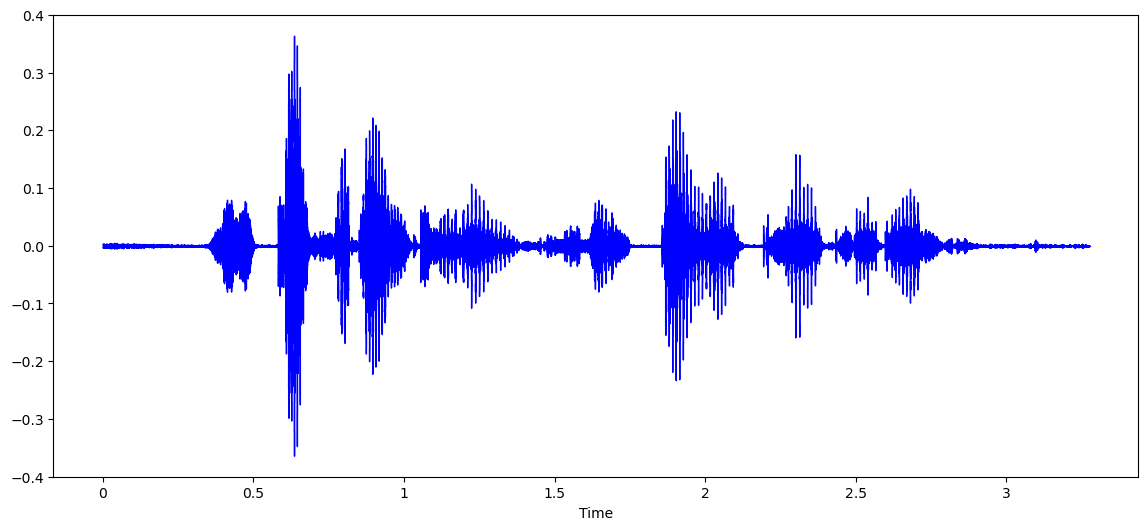

In [42]:
plt.figure(figsize=(14, 6))
librosa.display.waveshow(y=y, sr=sr, color='blue')
plt.show()

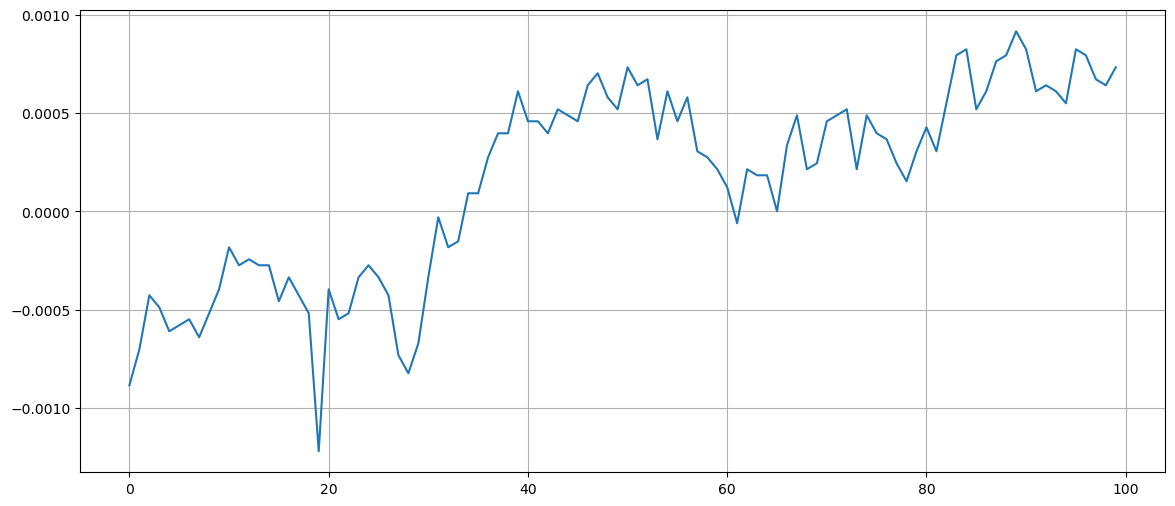

In [43]:
n_0 = 9_000
n_1 = 9_100

plt.figure(figsize=(14, 6))
plt.plot(y[n_0:n_1])
plt.grid()
plt.show()

In [45]:
zero_crossings = librosa.zero_crossings(y[n_0:n_1])
zcrs = librosa.feature.zero_crossing_rate(x)

zcrs

array([[0.15039062, 0.22607422, 0.30126953, 0.30175781, 0.30126953,
        0.30175781, 0.30126953, 0.30175781, 0.30126953, 0.30175781,
        0.30175781, 0.30175781, 0.30175781, 0.30175781, 0.30175781,
        0.30175781, 0.30175781, 0.30175781, 0.30175781, 0.30175781,
        0.28125   , 0.23583984, 0.19140625, 0.14599609, 0.12207031,
        0.12207031, 0.12207031, 0.12255859, 0.12207031, 0.12207031,
        0.12207031, 0.12207031, 0.12255859, 0.12207031, 0.12255859,
        0.12207031, 0.12207031, 0.12207031, 0.12207031, 0.12255859,
        0.12207031, 0.12207031, 0.09912109, 0.07421875, 0.04931641,
        0.02441406, 0.02246094, 0.02246094, 0.02246094, 0.02246094,
        0.02246094, 0.02246094, 0.02246094, 0.02246094, 0.02246094,
        0.02246094, 0.02246094, 0.02246094, 0.02246094, 0.02246094,
        0.02246094, 0.02246094, 0.02246094, 0.02050781, 0.015625  ,
        0.01074219, 0.00585938, 0.00244141, 0.00244141, 0.00244141,
        0.00244141, 0.00244141, 0.00292969, 0.00

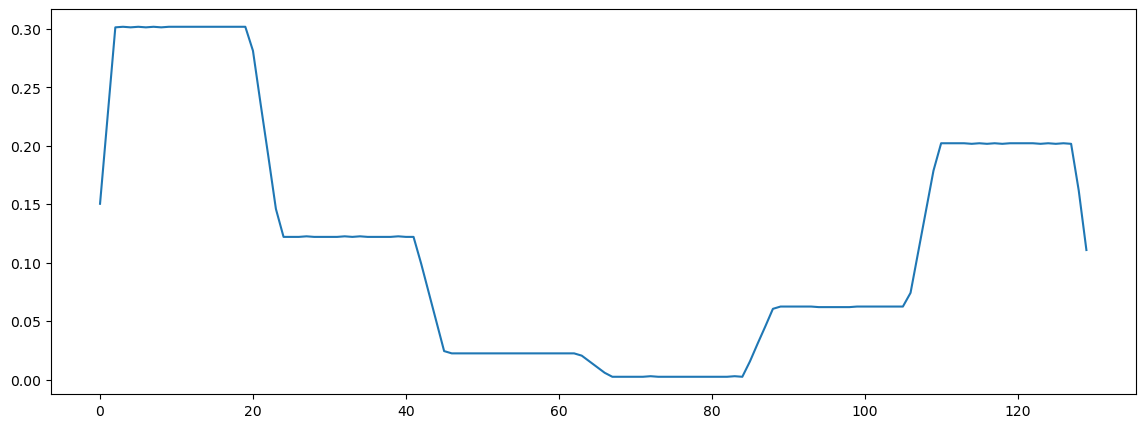

In [46]:
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])
plt.show()

## 스펙트럼 센트로이드 (Spectral Centroid)

* 주파수의 스펙트럼의 가중 평균과 같음

In [48]:
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

spectral_centroids.shape

(103,)

In [50]:
from sklearn.preprocessing import minmax_scale

plt.figure(figsize=(12, 6))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(y=y, sr=sr, alpha=.4, color='blue')
plt.plot(t, minmax_scale(spectral_centroids, axis=0), color='red')
plt.show()

## 스펙트럼 롤오프 (Spectral Rolloff)

* 신호의 모양을 측정
* 고주파수가 0으로 감소하는 주파수를 나타냄

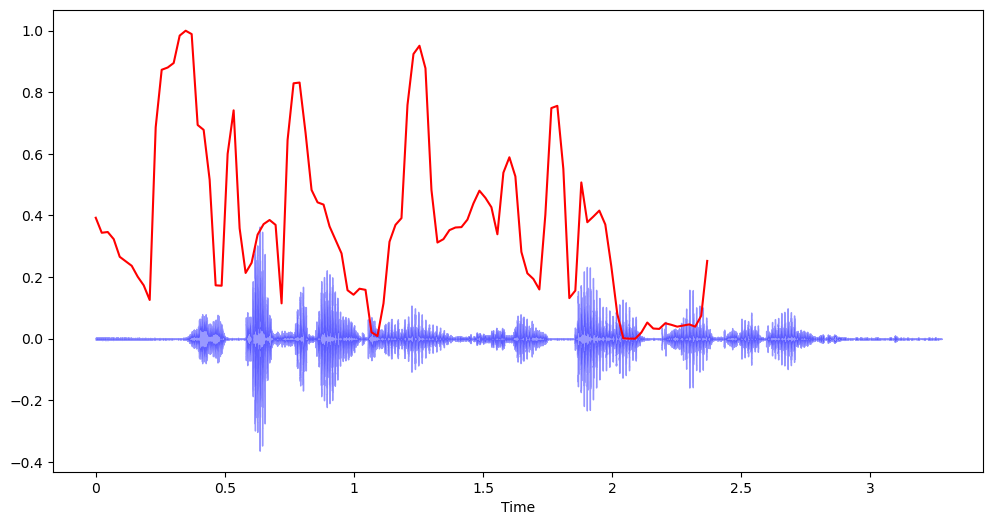

In [52]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=y + .01, sr=sr)[0]
plt.figure(figsize=(12, 6))

librosa.display.waveshow(y=y, sr=sr, alpha=.4, color='blue')
plt.plot(t, minmax_scale(spectral_rolloff, axis=0), color='red')
plt.show()

## 스펙트럼 대역폭 (Spectral Bandwidth)

* 스펙트럼 대역폭은 최대 피크의 절반 (또는 최대 절반의 전체 너비 [FWHM])에서 빛의 대역 폭으로 정의되며 두 개의 수직 빨간색 선과 파장 축에서 λSB로 표시

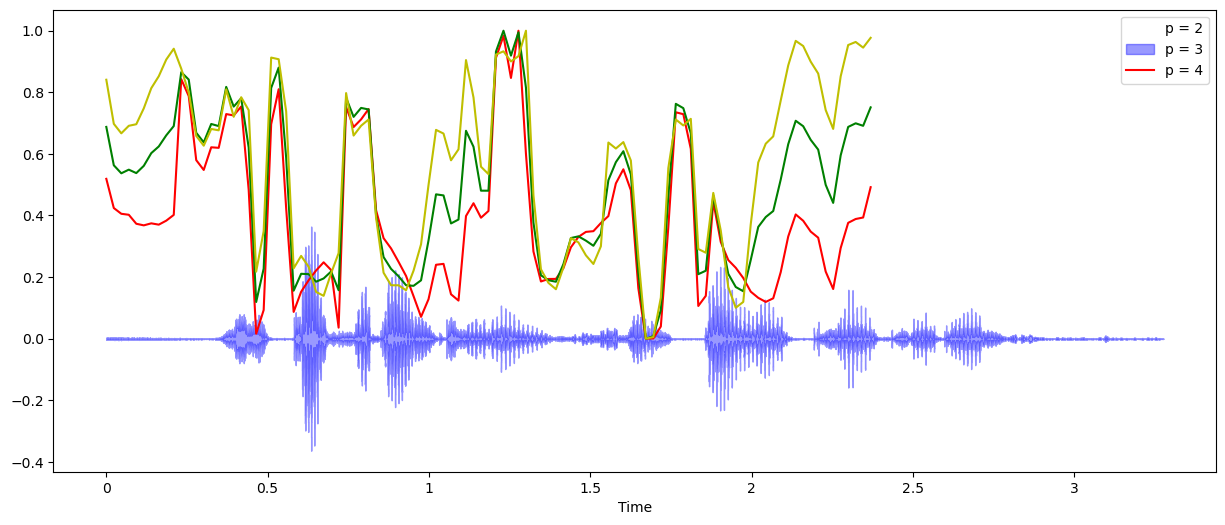

In [53]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y + .01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y + .01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y + .01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 6))

librosa.display.waveshow(y=y, sr=sr, alpha=.4, color='blue')
plt.plot(t, minmax_scale(spectral_bandwidth_2, axis=0), color='r')
plt.plot(t, minmax_scale(spectral_bandwidth_3, axis=0), color='g')
plt.plot(t, minmax_scale(spectral_bandwidth_4, axis=0), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))
plt.show()

## Mel-Frequency Cepstral Coefficients (MFCC)

* 신호의 MFCC(Mel frequency cepstral coefficients)는 스펙트럼 포락선의 전체 모양을 간결하게 설명하는 작은 기능 집합 (일반적으로 약 10-20)
* 인간 목소리의 특성을 모델링

## 크로마그램 (Chromagram)

* 색도 특성 또는 벡터는  일반적으로 각각의 피치 클래스의 많은 에너지가, {C, C #, D, D 번호는, E, ..., B} 신호 내에 존재하는 방법을 나타내는 요소 특징 벡터
* 음악 작품 간의 유사성 측정을 설명하는 강력한 방법 제공